In [2]:
import warnings
warnings.filterwarnings("ignore")

import os.path
import ssm
import pickle
import numpy as np
import pandas as pd
import scipy
import copy
from tqdm import tqdm

from runwise_ts_log_data import get_ts_log_data_blocked

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import to_rgba
import seaborn as sns

from sympy.utilities.iterables import multiset_permutations
from ssm.util import *
from scipy.stats import ttest_ind,wilcoxon,ranksums

In [3]:
with open("pkl/emoprox2_dataset_timeseries+inputs_MAX85.pkl", "rb") as f:
    orig_df = pickle.load(f)
subj_list = sorted(orig_df["pid"].unique())
# subj_list = subj_list[:] # remove first 30 subjects
orig_df = orig_df[orig_df["pid"].isin(subj_list)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


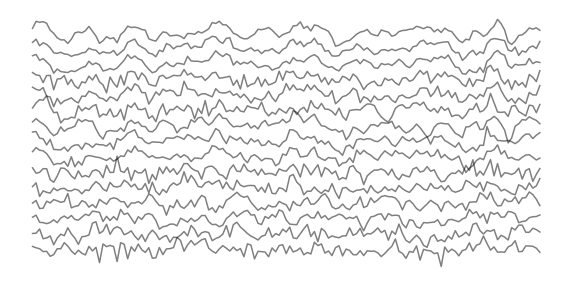

In [49]:
ts = orig_df.timeseries.values[2].copy()
fig,ax=plt.subplots(1,1,figsize=(10,5))
for i in range(ts.shape[1]):
    ts[:,i] = ts[:,i]+i*3
_ = ax.plot(ts[:,:15],color='k',alpha=0.5)
plt.axis('off')
fig.savefig(
    f"figures/timeseries.eps", dpi=600, bbox_inches="tight"
)